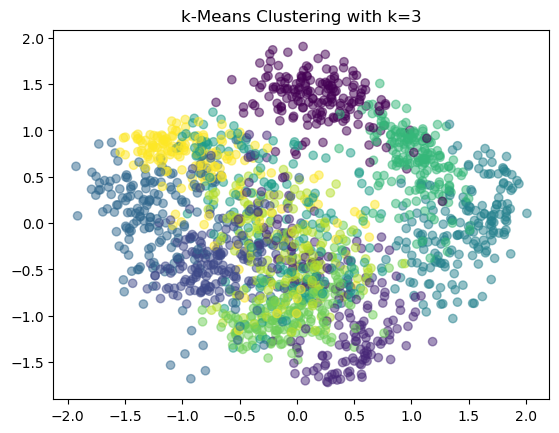

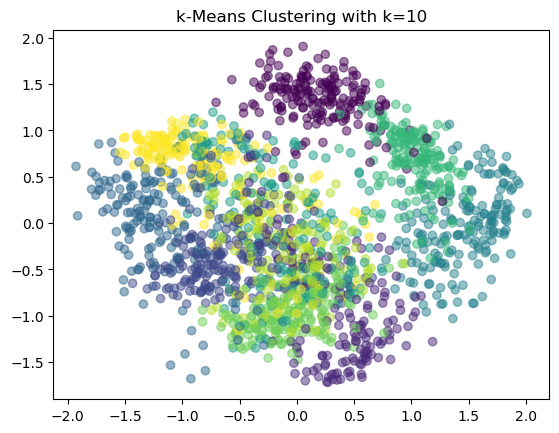

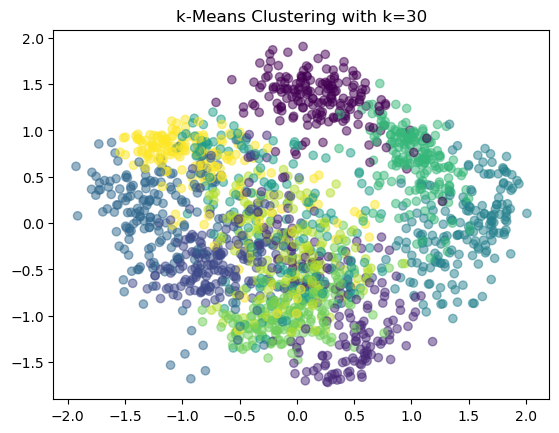

k=3: Mean Distance to Centroids=2.354253857665086, Calinski-Harabasz Index=219.71413820305523
k=10: Mean Distance to Centroids=2.6002143634074195, Calinski-Harabasz Index=165.40276892746456
k=30: Mean Distance to Centroids=2.7201181302098987, Calinski-Harabasz Index=86.24285365535013
The best model has k=3 with a mean distance to centroids of 2.354253857665086 and a Calinski-Harabasz Index of 219.71413820305523


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score, pairwise_distances

train_data = pd.read_csv('digitDset_train.csv', header=None)
test_data = pd.read_csv('digitDset_test.csv', header=None)

# independent features and class labels
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Min-Max normalization
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Define k values to test
k_values = [3, 10, 30]

# Initialize lists to store results
best_models = []
mean_distances = []
calinski_scores = []

# Loop over k values
for k in k_values:
    # Initialize list to store models
    models = []
    
    for i in range(10):
        # Initialize k-means model
        model = KMeans(n_clusters=k, random_state=i)
        
        # Fit the model to training data
        model.fit(X_train_norm)
        
        # Add the model to list
        models.append(model)
    
    # mean distance to the centroids for each model
    distances = []
    for model in models:
        distances.append(np.mean(pairwise_distances(X_test_norm, model.cluster_centers_)))
    
    best_model = models[np.argmin(distances)]
    best_models.append(best_model)
    mean_distances.append(np.min(distances))
    
    # Predict clusters for the testing data using the best model
    y_pred = best_model.predict(X_test_norm)
    
    # Calculate Calinski-Harabasz Index for the best model
    calinski_score = calinski_harabasz_score(X_test_norm, y_pred)
    calinski_scores.append(calinski_score)
    
    # Visualize the clusters with a scatter plot
    pca = PCA(n_components=2)
    X_test_pca = pca.fit_transform(X_test_norm)
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.5)
    plt.title(f'k-Means Clustering with k={k}')
    plt.show()

for i, k in enumerate(k_values):
    print(f'k={k}: Mean Distance to Centroids={mean_distances[i]}, Calinski-Harabasz Index={calinski_scores[i]}')

# k-means model with the highest Calinski-Harabasz Index and the lowest mean distance to the centroids
best_index = np.argmax(calinski_scores)
best_model = best_models[best_index]
print(f'The best model has k={k_values[best_index]} with a mean distance to centroids of {mean_distances[best_index]} and a Calinski-Harabasz Index of {calinski_scores[best_index]}')


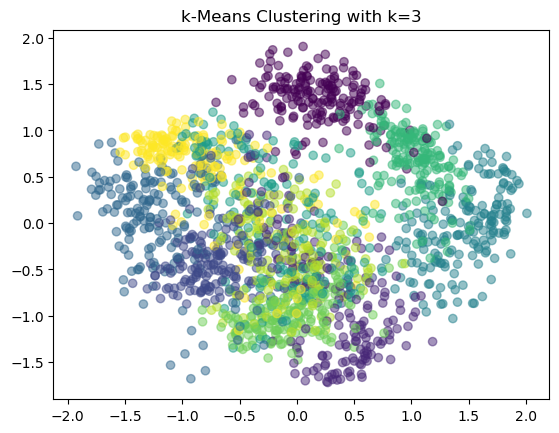

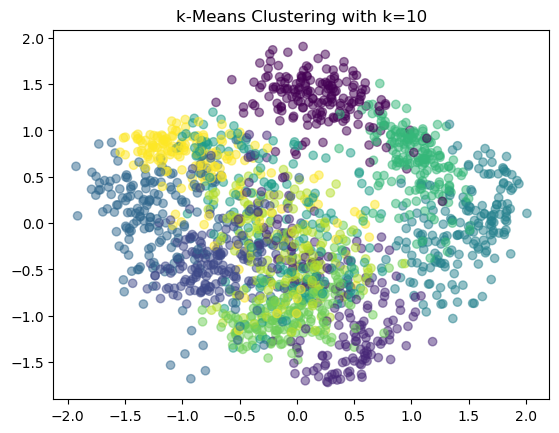

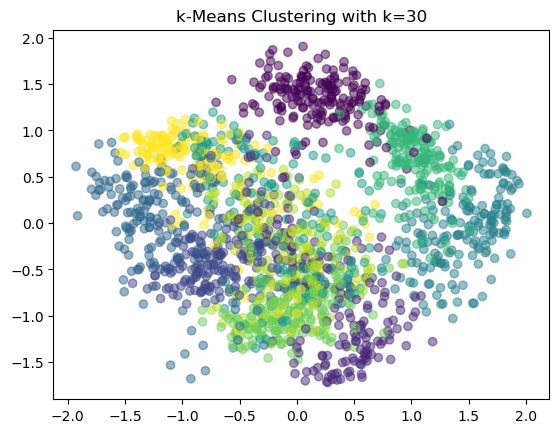

k=3: Mean Distance to Centroids=2.354253857665086, Silhouette Coefficient=0.12515741142586634
k=10: Mean Distance to Centroids=2.6002143634074195, Silhouette Coefficient=0.18511876087278253
k=30: Mean Distance to Centroids=2.7201181302098987, Silhouette Coefficient=0.11177960587085548
The best model has k=10 with a mean distance to centroids of 2.6002143634074195 and a Silhouette Coefficient of 0.18511876087278253


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, pairwise_distances

train_data = pd.read_csv('digitDset_train.csv', header=None)
test_data = pd.read_csv('digitDset_test.csv', header=None)

X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Normalizing -  Min-Max normalization
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# k values to test
k_values = [3, 10, 30]

# Initializing lists to store results
best_models = []
mean_distances = []
silhouette_scores = []

# Loop over k values
for k in k_values:
    models = []
    
    for i in range(10):
        # Initialize k-means model
        model = KMeans(n_clusters=k, random_state=i)
        
        model.fit(X_train_norm)
        
        models.append(model)
    
    # mean distance to the centroids for each model
    distances = []
    for model in models:
        distances.append(np.mean(pairwise_distances(X_test_norm, model.cluster_centers_)))
    
    # model with the lowest mean distance as best model
    best_model = models[np.argmin(distances)]
    best_models.append(best_model)
    mean_distances.append(np.min(distances))
    
    # Predicted clusters for the testing data using the best model
    y_pred = best_model.predict(X_test_norm)
    
    # Silhouette Coefficient for the best model
    silhouette = silhouette_score(X_test_norm, y_pred)
    silhouette_scores.append(silhouette)
    
    # Visualizing clusters with a scatter plot
    pca = PCA(n_components=2)
    X_test_pca = pca.fit_transform(X_test_norm)
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.5)
    plt.title(f'k-Means Clustering with k={k}')
    plt.show()

for i, k in enumerate(k_values):
    print(f'k={k}: Mean Distance to Centroids={mean_distances[i]}, Silhouette Coefficient={silhouette_scores[i]}')

# k-means model with the highest Silhouette Coefficient and the lowest mean distance to the centroids
best_index = np.argmax(silhouette_scores)
best_model = best_models[best_index]
print(f'The best model has k={k_values[best_index]} with a mean distance to centroids of {mean_distances[best_index]} and a Silhouette Coefficient of {silhouette_scores[best_index]}')
